In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Load data
topics = pd.read_csv('../../src/nlp/topic_modeling/topic_data.csv')
roles = pd.read_csv('../../src/data/distribuitions/hub_bridge_df.csv')

In [124]:
topics.drop(columns=['lemmatized_text'], inplace=True)
topics['date'] = pd.to_datetime(topics['date']).dt.date
topics.head()

,author,id,type,date,topic,topic_id
0,Raichu4u,1mv3z5n,post,2025-08-20,0_democrats_voters_dems_votes,0
1,KingGhidorah1225,1musrfu,post,2025-08-19,0_democrats_voters_dems_votes,0
2,Potato_Cat93,1mujuir,post,2025-08-19,0_democrats_voters_dems_votes,0
3,Rong_Liu,1mumwdb,post,2025-08-19,0_democrats_voters_dems_votes,0
4,Candle-Jolly,1mun37m,post,2025-08-19,0_democrats_voters_dems_votes,0


In [125]:
roles['author'] = roles['id']
roles.drop(columns=['id','degree','internal_degree', 'external_degree','pct_internal', 'pct_external', 'z_internal', 'betweenness'], inplace=True)

In [126]:
roles.head()

,community_id,community_type,is_hub,is_bridge,author
0,0,Very Strong,False,False,-Dead-Eye-Duncan-
1,0,Very Strong,False,False,10ebbor10
2,0,Very Strong,False,False,3superfrank
3,0,Very Strong,False,False,Allalilacias
4,0,Very Strong,False,False,Angel1571


In [127]:
global_info = topics.merge(roles, on='author', how='left')
global_info.head()

,author,id,type,date,topic,topic_id,community_id,community_type,is_hub,is_bridge
0,Raichu4u,1mv3z5n,post,2025-08-20,0_democrats_voters_dems_votes,0,3,Strong,True,False
1,KingGhidorah1225,1musrfu,post,2025-08-19,0_democrats_voters_dems_votes,0,3,Strong,False,False
2,Potato_Cat93,1mujuir,post,2025-08-19,0_democrats_voters_dems_votes,0,3,Strong,False,False
3,Rong_Liu,1mumwdb,post,2025-08-19,0_democrats_voters_dems_votes,0,3,Strong,False,False
4,Candle-Jolly,1mun37m,post,2025-08-19,0_democrats_voters_dems_votes,0,3,Strong,False,False


In [128]:
# Retrieving top 5 topics globally
top_topics = global_info['topic'].value_counts().head().index.tolist()
top_topics

['1_christianity_muslims_religions_violent',
 '0_democrats_voters_dems_votes',
 '3_birthday_bride_gifts_ceremony',
 '5_healthcare_tariffs_medicaid_deficit',
 '2_genocide_hamas_palestinians_gaza']

In [129]:
topic_distribuition = global_info.loc[global_info['topic'].isin(top_topics)]
topic_distribuition

,author,id,type,date,topic,topic_id,community_id,community_type,is_hub,is_bridge
0,Raichu4u,1mv3z5n,post,2025-08-20,0_democrats_voters_dems_votes,0,3,Strong,True,False
1,KingGhidorah1225,1musrfu,post,2025-08-19,0_democrats_voters_dems_votes,0,3,Strong,False,False
2,Potato_Cat93,1mujuir,post,2025-08-19,0_democrats_voters_dems_votes,0,3,Strong,False,False
3,Rong_Liu,1mumwdb,post,2025-08-19,0_democrats_voters_dems_votes,0,3,Strong,False,False
4,Candle-Jolly,1mun37m,post,2025-08-19,0_democrats_voters_dems_votes,0,3,Strong,False,False
...,...,...,...,...,...,...,...,...,...,...
230642,Aggressive-Bowl-9560,n2wvvo4,comment,2025-07-13,1_christianity_muslims_religions_violent,1,4,Strong,False,False
230643,Aggressive-Bowl-9560,n2wzzsx,comment,2025-07-13,1_christianity_muslims_religions_violent,1,4,Strong,False,False
230644,Appropriate-Error239,n3lx6pv,comment,2025-07-17,3_birthday_bride_gifts_ceremony,3,4,Strong,False,False
230645,K_A_irony,n2y15nj,comment,2025-07-13,3_birthday_bride_gifts_ceremony,3,2,Strong,False,False


In [130]:
topic_distribuition = topic_distribuition.groupby(['date', 'topic'])['author'].count().reset_index().rename(columns={'author':'count'})
topic_distribuition

,date,topic,count
0,2025-01-01,0_democrats_voters_dems_votes,1
1,2025-01-01,1_christianity_muslims_religions_violent,2
2,2025-01-02,1_christianity_muslims_religions_violent,1
3,2025-01-02,5_healthcare_tariffs_medicaid_deficit,1
4,2025-01-03,1_christianity_muslims_religions_violent,1
...,...,...,...
837,2025-08-22,0_democrats_voters_dems_votes,425
838,2025-08-22,1_christianity_muslims_religions_violent,491
839,2025-08-22,2_genocide_hamas_palestinians_gaza,53
840,2025-08-22,3_birthday_bride_gifts_ceremony,339


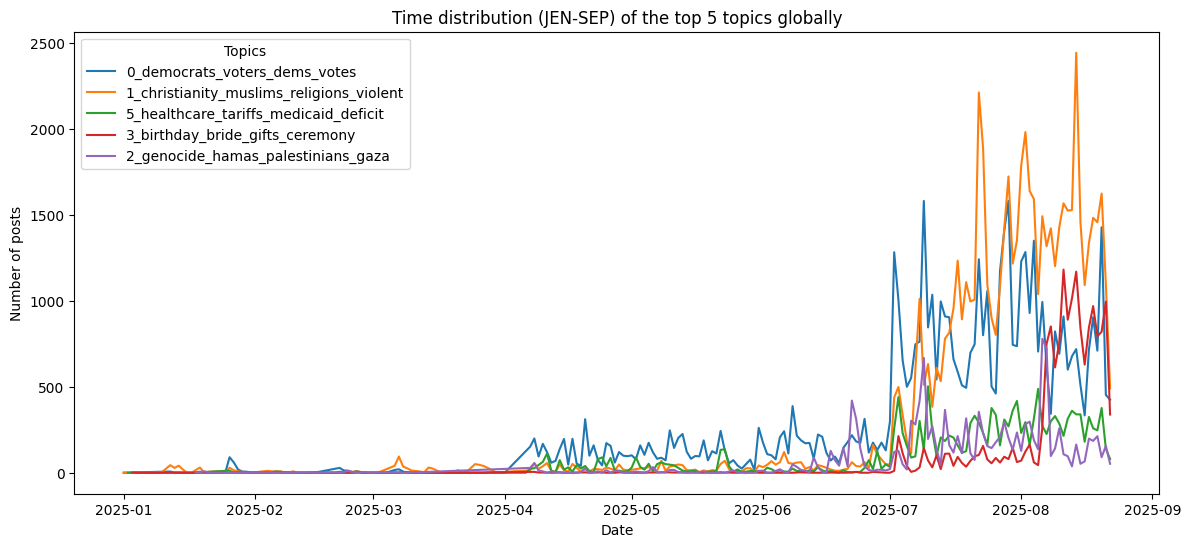

In [131]:
plt.figure(figsize=(14,6))
plt.title('Time distribution (JEN-SEP) of the top 5 topics globally')
plt.xlabel('Date')
plt.ylabel('Number of posts')
sns.lineplot(data=topic_distribuition, x='date', y='count', hue='topic')
plt.legend(title='Topics')

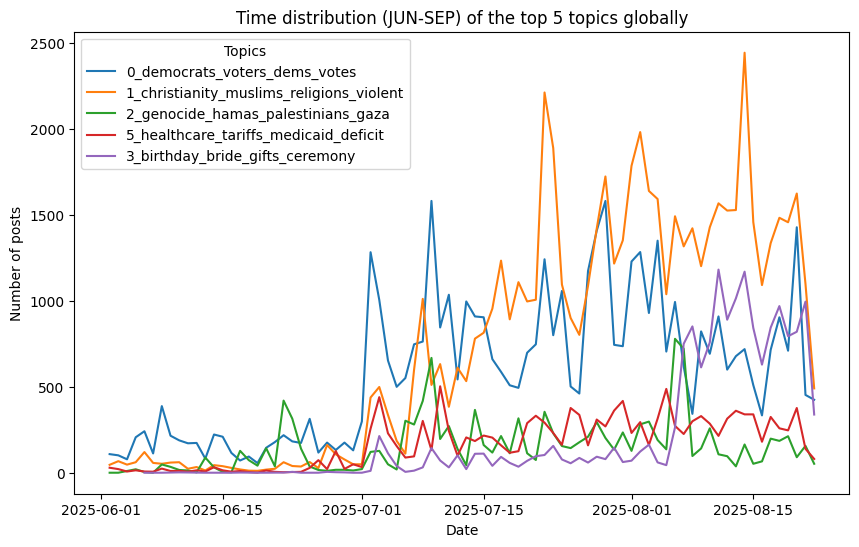

In [132]:
# Reducing time windows
topic_distribuition_xm= topic_distribuition.loc[topic_distribuition['topic'].isin(top_topics) & (topic_distribuition['date'] > pd.to_datetime('2025-06-01').date())]
plt.figure(figsize=(10,6))
plt.title('Time distribution (JUN-SEP) of the top 5 topics globally')
plt.xlabel('Date')
plt.ylabel('Number of posts')
sns.lineplot(data=topic_distribuition_xm, x='date', y='count', hue='topic')
plt.legend(title='Topics')

#### Sentiment Analysis

In [133]:
sentiments = pd.read_csv('../../src/nlp/sentiment/sentiment_scores.csv')
sentiments.drop(columns=['author', 'model', 'neg_percentage', 'pos_percentage', 'neu_percentage'], inplace=True)

In [134]:
sentiments.head()
sentiments['predicted_sentiment'] = sentiments['predicted_sentiment'].map({'negative' : -1, 'neutral' : 0, 'positive' : 1})


In [135]:
sentiment_agg = sentiments.merge(global_info, on='id', how='left')
sentiment_distribuition = sentiment_agg.loc[sentiment_agg['topic'].isin(top_topics)]

In [136]:
sentiment_distribuition = sentiment_distribuition.groupby(['topic', 'date', 'predicted_sentiment']).size().reset_index(name='count')
sentiment_distribuition

,topic,date,predicted_sentiment,count
0,0_democrats_voters_dems_votes,2025-01-01,0.0,1
1,0_democrats_voters_dems_votes,2025-01-12,-1.0,2
2,0_democrats_voters_dems_votes,2025-01-12,0.0,6
3,0_democrats_voters_dems_votes,2025-01-13,-1.0,1
4,0_democrats_voters_dems_votes,2025-01-14,0.0,1
...,...,...,...,...
2009,5_healthcare_tariffs_medicaid_deficit,2025-08-21,0.0,76
2010,5_healthcare_tariffs_medicaid_deficit,2025-08-21,1.0,4
2011,5_healthcare_tariffs_medicaid_deficit,2025-08-22,-1.0,36
2012,5_healthcare_tariffs_medicaid_deficit,2025-08-22,0.0,39


In [137]:
sentiment_distribuition = sentiment_distribuition.groupby(['topic', 'date', 'count'])['predicted_sentiment'].agg(['mean']).reset_index()
sentiment_distribuition

,topic,date,count,mean
0,0_democrats_voters_dems_votes,2025-01-01,1,0.0
1,0_democrats_voters_dems_votes,2025-01-12,2,-1.0
2,0_democrats_voters_dems_votes,2025-01-12,6,0.0
3,0_democrats_voters_dems_votes,2025-01-13,1,-1.0
4,0_democrats_voters_dems_votes,2025-01-14,1,0.0
...,...,...,...,...
1941,5_healthcare_tariffs_medicaid_deficit,2025-08-21,60,-1.0
1942,5_healthcare_tariffs_medicaid_deficit,2025-08-21,76,0.0
1943,5_healthcare_tariffs_medicaid_deficit,2025-08-22,6,1.0
1944,5_healthcare_tariffs_medicaid_deficit,2025-08-22,36,-1.0


<Axes: title={'center': 'Topic Sentiment Distribution over time'}, xlabel='date', ylabel='topic'>

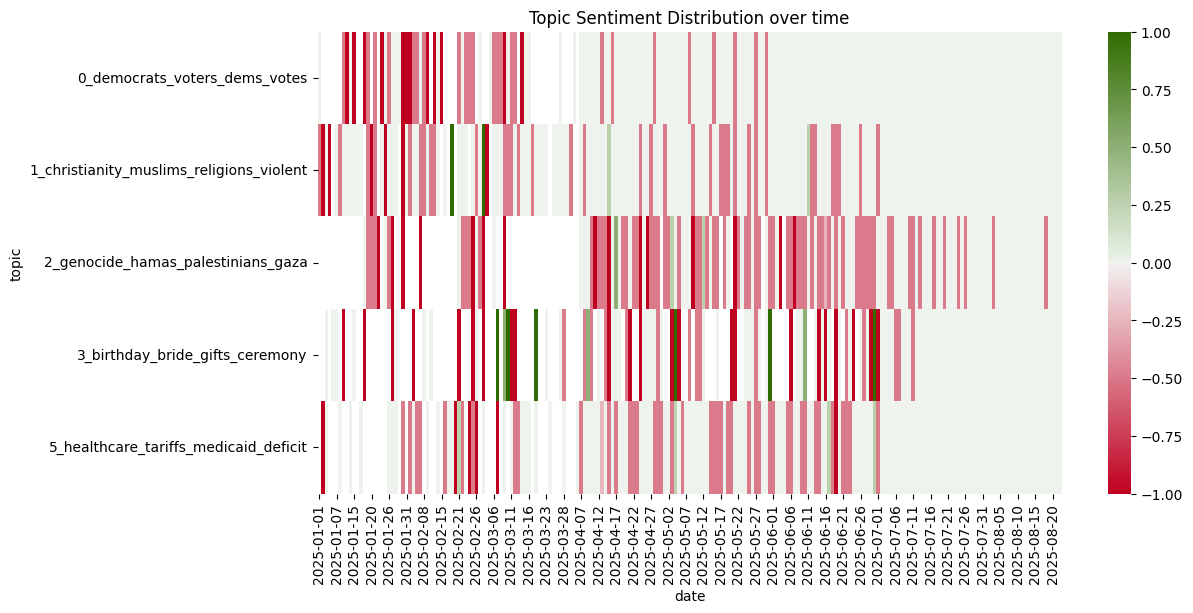

In [138]:
plt.figure(figsize=(12, 6))
plt.title('Topic Sentiment Distribution over time')
diverging_palette= sns.diverging_palette(10, 120, s=100, l=40, as_cmap=True)
sns.heatmap(data=sentiment_distribuition.pivot_table(index='topic', columns='date', values='mean'), cmap=diverging_palette, center=0)